In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
# Necessary libraries and imports to complete this tutorial
from scipy.stats import f
import seaborn as sns
from sklearn import model_selection
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
import random
from scipy.spatial import distance

# Chargement du dataset dans une DataFrame
dataset_R6 = pd.read_csv("./DatasetR6/S5_operators.csv", sep=';')

# Affichage des 5 premières lignes du dataset
print(dataset_R6.head())

  platform    dateid skillrank      role       operator primaryweapon  \
0       PC  20170210    Bronze  Attacker   BOPE-CAPITAO          M249   
1       PC  20170210    Bronze  Attacker   BOPE-CAPITAO          M249   
2       PC  20170210    Bronze  Attacker   BOPE-CAPITAO      PARA-308   
3       PC  20170210    Bronze  Attacker   BOPE-CAPITAO      PARA-308   
4       PC  20170210    Bronze  Attacker  G.E.O.-JACKAL           C7E   

  secondaryweapon secondarygadget  nbwins  nbkills  nbdeaths  nbpicks  
0           PRB92        CLAYMORE       6        6         6        8  
1           PRB92    STUN GRENADE       4        2         6        8  
2           PRB92        CLAYMORE      37       40        49       70  
3           PRB92    STUN GRENADE      17       24        31       41  
4          ITA12S   BREACH CHARGE      74      123       127      174  


In [9]:
from sklearn.cluster import AgglomerativeClustering

dataset_R6 = pd.read_csv("./DatasetR6/S5_operators.csv", sep=';')

# plus de lose rate
dataset_R6.insert(dataset_R6.shape[1],"w/r", (dataset_R6["nbwins"]/dataset_R6["nbpicks"]), True) 
dataset_R6.insert(dataset_R6.shape[1],"k/r", (dataset_R6["nbkills"]/dataset_R6["nbpicks"]), True) 
dataset_R6.insert(dataset_R6.shape[1],"d/r", (1-(dataset_R6["nbdeaths"]/dataset_R6["nbpicks"])), True) 
dataset_R6.drop(columns=["nbwins","nbpicks","role"], inplace=True)


# on merge et enleve les colonnes plateformes et dateid sans perdre les données associées
dataset_R6 = dataset_R6.groupby(['skillrank','operator', 'primaryweapon', 'secondaryweapon', 'secondarygadget'], as_index=False)[['w/r','k/r','d/r']].mean()
dataset_R6.drop(columns=['skillrank','operator', 'primaryweapon', 'secondaryweapon', 'secondarygadget'], inplace=True)

dataset_test = dataset_R6.copy()
clusterings = []
for i in range(6) :
    clusterings.append(AgglomerativeClustering(n_clusters=i+1).fit(dataset_test))
#dataset_test.shape

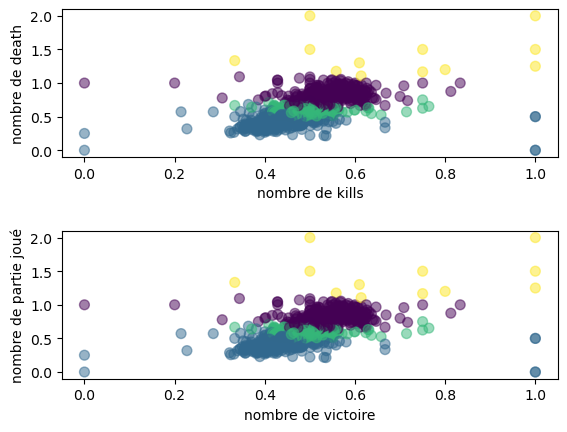

In [11]:
fig, axs = plt.subplots(2)


axs[0].scatter(dataset_test['w/r'], dataset_test['k/r'],c=clusterings[3].labels_.astype(float), s=50, alpha=0.5)  
axs[0].set_xlabel('nombre de kills')
axs[0].set_ylabel('nombre de death')

axs[1].scatter(dataset_test['w/r'], dataset_test['k/r'],c=clusterings[3].labels_.astype(float), s=50, alpha=0.5)
axs[1].set_xlabel('nombre de victoire')
axs[1].set_ylabel('nombre de partie joué')


fig.subplots_adjust(hspace=0.5)  # Ajustez la valeur selon vos besoins

plt.show()

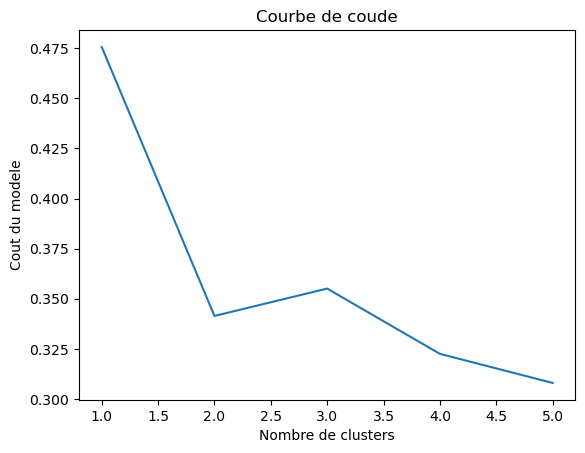

In [13]:
from sklearn.metrics import silhouette_score
silhouette = []

for i in range(1,6):
    silhouette.append(silhouette_score(dataset_test,clusterings[i].labels_))

plt.plot(range(1, 6), silhouette)
plt.title('Courbe de coude')
plt.xlabel('Nombre de clusters')
plt.ylabel('Cout du modele')
plt.show()

In [44]:
for i in clusterings :
    print(i.labels_)

[0 0 0 ... 0 0 0]
[1 1 1 ... 1 1 1]
[0 0 0 ... 0 0 0]
[1 1 1 ... 1 3 1]
[1 1 1 ... 1 3 1]
[0 0 0 ... 0 3 0]


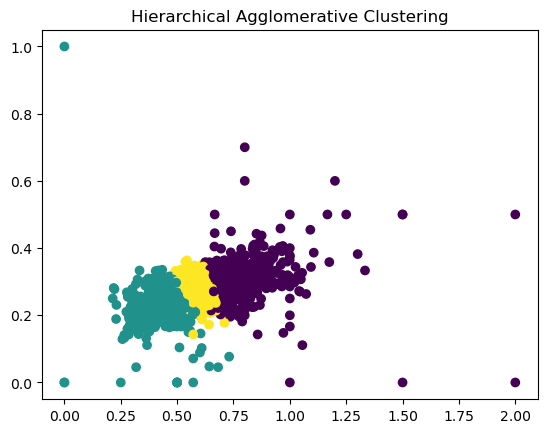

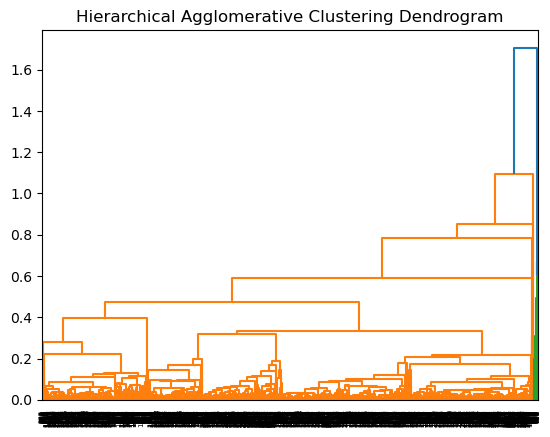

In [1]:
# Importer les bibliothèques nécessaires
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

dataset_R6 = pd.read_csv("./DatasetR6/S5_operators.csv", sep=';')

# plus de lose rate
dataset_R6.insert(dataset_R6.shape[1],"w/r", (dataset_R6["nbwins"]/dataset_R6["nbpicks"]), True) 
dataset_R6.insert(dataset_R6.shape[1],"k/r", (dataset_R6["nbkills"]/dataset_R6["nbpicks"]), True) 
dataset_R6.insert(dataset_R6.shape[1],"d/r", (1-(dataset_R6["nbdeaths"]/dataset_R6["nbpicks"])), True) 
dataset_R6.drop(columns=["nbwins","nbpicks","role"], inplace=True)


# on merge et enleve les colonnes plateformes et dateid sans perdre les données associées
dataset_R6 = dataset_R6.groupby(['skillrank','operator', 'primaryweapon', 'secondaryweapon', 'secondarygadget'], as_index=False)[['w/r','k/r','d/r']].mean()
dataset_R6.drop(columns=['skillrank','operator', 'primaryweapon', 'secondaryweapon', 'secondarygadget'], inplace=True)

dataset = dataset_R6.copy()



# Générer des données synthétiques
#X, y = make_blobs(n_samples=300, centers=4, random_state=42)

# Effectuer le clustering hiérarchique agglomératif
model = AgglomerativeClustering(n_clusters=3, linkage='ward')  # Le paramètre 'ward' utilise la méthode de liaison de Ward
labels = model.fit_predict(dataset)


# Afficher les résultats
plt.scatter(dataset['k/r'], dataset['d/r'], c=labels, cmap='viridis')
plt.title('Hierarchical Agglomerative Clustering')
plt.show()

# Afficher le dendrogramme
#linked = linkage(dataset, 'ward') 1
#linked = linkage(dataset, 'single')
#linked = linkage(dataset, 'average')
#linked = linkage(dataset, 'complete') 1
#linked = linkage(dataset, 'weighted') 1
#linked = linkage(dataset, 'centroid') 
#linked = linkage(dataset, 'median')


linked = linkage(dataset, 'median')
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=False)
plt.title('Hierarchical Agglomerative Clustering Dendrogram')
plt.show()